# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [166]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [167]:
file_path = "./pollution_dataset.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

In [168]:
label_encoder = LabelEncoder()
df['Air Quality'] = label_encoder.fit_transform(df['Air Quality'])

In [169]:
X = df.drop(columns=['Air Quality'])
y = df['Air Quality']

In [170]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [171]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [172]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [173]:
train_y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [174]:
# train_y

## FIRST NN


In [175]:
from keras import Input
model = Sequential([
    Input(shape=(train_X.shape[1],)),
    Dense(32, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(train_y.shape[1], kernel_initializer="uniform", activation="softmax"),
])

In [176]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [177]:
history = model.fit(train_X, train_y, validation_split=0.2, epochs=32, batch_size=16)


Epoch 1/32
200/200 [==============================] - 0s 562us/step - loss: 0.9269 - accuracy: 0.6147 - val_loss: 0.4987 - val_accuracy: 0.8000
Epoch 2/32
200/200 [==============================] - 0s 343us/step - loss: 0.3451 - accuracy: 0.8741 - val_loss: 0.2474 - val_accuracy: 0.9187
Epoch 3/32
200/200 [==============================] - 0s 320us/step - loss: 0.2188 - accuracy: 0.9231 - val_loss: 0.1971 - val_accuracy: 0.9250
Epoch 4/32
200/200 [==============================] - 0s 318us/step - loss: 0.1848 - accuracy: 0.9322 - val_loss: 0.1690 - val_accuracy: 0.9362
Epoch 5/32
200/200 [==============================] - 0s 318us/step - loss: 0.1732 - accuracy: 0.9375 - val_loss: 0.1620 - val_accuracy: 0.9362
Epoch 6/32
200/200 [==============================] - 0s 319us/step - loss: 0.1655 - accuracy: 0.9366 - val_loss: 0.1455 - val_accuracy: 0.9400
Epoch 7/32
200/200 [==============================] - 0s 323us/step - loss: 0.1624 - accuracy: 0.9400 - val_loss: 0.1545 - val_accuracy:

<Axes: >

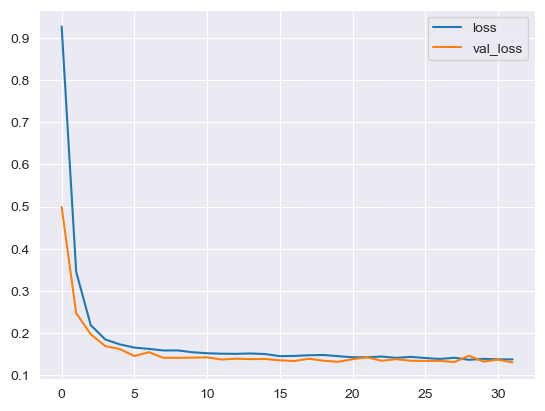

In [178]:
import seaborn as sns
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [179]:
pred_y = model.predict(test_X)

32/32 [==============================] - 0s 296us/step


In [180]:
from sklearn.metrics import r2_score

r2_score(test_y, pred_y)

0.841964602470398

## SECOND NN

In [181]:
model2 = Sequential([
    Dense(64, activation='sigmoid', input_shape=(train_X.shape[1],)),  
    Dense(32, activation='sigmoid'),  
    Dense(train_y.shape[1], activation='softmax') 
])

In [182]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [183]:
history2 = model2.fit(train_X, train_y, validation_split=0.2, epochs=32, batch_size=16, verbose=1)


Epoch 1/32
200/200 [==============================] - 0s 514us/step - loss: 1.0726 - accuracy: 0.4641 - val_loss: 0.7345 - val_accuracy: 0.6775
Epoch 2/32
200/200 [==============================] - 0s 324us/step - loss: 0.5837 - accuracy: 0.8125 - val_loss: 0.4715 - val_accuracy: 0.8413
Epoch 3/32
200/200 [==============================] - 0s 315us/step - loss: 0.4078 - accuracy: 0.8494 - val_loss: 0.3494 - val_accuracy: 0.8587
Epoch 4/32
200/200 [==============================] - 0s 317us/step - loss: 0.3253 - accuracy: 0.8784 - val_loss: 0.2848 - val_accuracy: 0.9100
Epoch 5/32
200/200 [==============================] - 0s 317us/step - loss: 0.2764 - accuracy: 0.9191 - val_loss: 0.2435 - val_accuracy: 0.9375
Epoch 6/32
200/200 [==============================] - 0s 318us/step - loss: 0.2434 - accuracy: 0.9334 - val_loss: 0.2147 - val_accuracy: 0.9400
Epoch 7/32
200/200 [==============================] - 0s 315us/step - loss: 0.2201 - accuracy: 0.9362 - val_loss: 0.1953 - val_accuracy:

<Axes: >

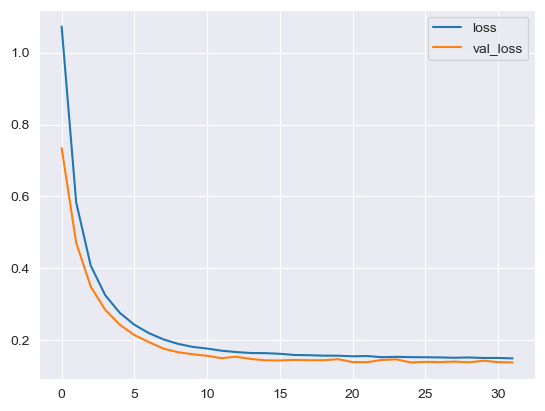

In [184]:
sns.lineplot(history2.history['loss'], label='loss')
sns.lineplot(history2.history['val_loss'], label='val_loss')

In [185]:
pred_y = model2.predict(test_X)
r2_score(test_y, pred_y)

32/32 [==============================] - 0s 271us/step


0.8331644535064697

## THIRD NN

In [186]:
model3 = Sequential([
    Dense(256, activation='tanh', input_shape=(train_X.shape[1],)),  
    Dense(128, activation='tanh'),  
    Dense(64, activation='tanh'), 
    Dense(32, activation='tanh'), 
    Dense(train_y.shape[1], activation='softmax')  
])

In [187]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [188]:
history3 = model3.fit(train_X, train_y, validation_split=0.2, epochs=32, batch_size=16, verbose=1)

Epoch 1/32
200/200 [==============================] - 0s 696us/step - loss: 0.3175 - accuracy: 0.8816 - val_loss: 0.1966 - val_accuracy: 0.9125
Epoch 2/32
200/200 [==============================] - 0s 505us/step - loss: 0.2088 - accuracy: 0.9209 - val_loss: 0.1983 - val_accuracy: 0.9250
Epoch 3/32
200/200 [==============================] - 0s 499us/step - loss: 0.1895 - accuracy: 0.9262 - val_loss: 0.1540 - val_accuracy: 0.9463
Epoch 4/32
200/200 [==============================] - 0s 503us/step - loss: 0.1812 - accuracy: 0.9297 - val_loss: 0.1576 - val_accuracy: 0.9362
Epoch 5/32
200/200 [==============================] - 0s 507us/step - loss: 0.1798 - accuracy: 0.9316 - val_loss: 0.1502 - val_accuracy: 0.9375
Epoch 6/32
200/200 [==============================] - 0s 507us/step - loss: 0.1736 - accuracy: 0.9300 - val_loss: 0.1463 - val_accuracy: 0.9438
Epoch 7/32
200/200 [==============================] - 0s 518us/step - loss: 0.1619 - accuracy: 0.9406 - val_loss: 0.1449 - val_accuracy:

<Axes: >

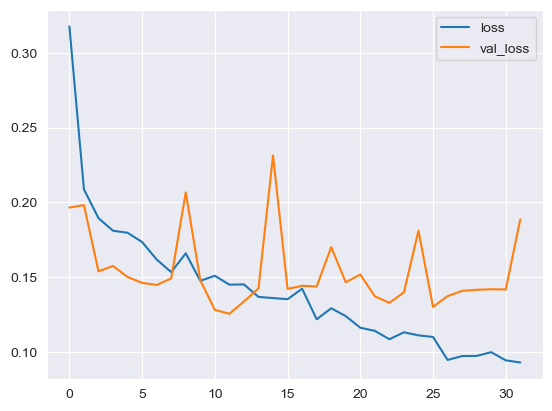

In [189]:
sns.lineplot(history3.history['loss'], label='loss')
sns.lineplot(history3.history['val_loss'], label='val_loss')

In [190]:
pred_y = model3.predict(test_X)
r2_score(test_y, pred_y)

32/32 [==============================] - 0s 343us/step


0.8009165525436401